# **<span style="font-family: 'Palatino Linotype', serif;">🧠🖼️🧪E se meus dados forem imagens? </span>**
----
*<span style="font-family: 'Angilla Tattoo'"> "Nos confins do universo digital, onde dados se tornam imagens e imagens se tornam almas, Maga Patolina e Maga Butterfly traçam os caminhos entre o código e o caos, desvendando o poder oculto nas transformações infinitas do saber." 🦆🦋💻🌌 </span>*



<div align="center">
    <img src = "Patolina e Borboleta.png" alt = "Magas pop" width = 350>
</div>

----
 **Objetivo:** Nesse notebook, iremos implementar uma rede neural convolucional (CNN) utilizando PyTorch e treiná-la com o banco de imagens MNIST.

 ----

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm


In [3]:
# Essa função irá tranformar os dados em tensores e normalizá-los
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [4]:
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)


In [5]:
class  CNN (nn.Module): 
    def  __init__ (self, num_dados_entrada, num_classes= 10 ): 
        """ 
        Define as camadas da rede neural convolucional. 

        Parâmetros: 
            num_dados_entrada: int 
                O número de canais na imagem de entrada. Para MNIST, é 1 (imagens em tons de cinza). 
            num_classes: int 
                O número de classes que queremos prever, no nosso caso 10 (dígitos de 0 a 9). 
        """ 
        super (CNN, self).__init__() 
        
        #convolução de matriz quadrada
        # padding (preenchimento): adição de pixels ao redor da borda de entrada
        # 8 canis de saída
        self.conv1 = nn.Conv2d(in_channels=num_dados_entrada, out_channels= 8 , kernel_size= 3 , stride = 1 , padding= 1)
        
        #pega a informação de maior relevância para fazer a previsão
        self.pool = nn.MaxPool2d(kernel_size= 2 , stride = 2) 
        
        #8 canais de entrada, 16 de saída
        #mais convoluções para ficar melhor
        self.conv2 = nn.Conv2d(in_channels = 8 , out_channels= 16 , kernel_size= 3 , stride= 1 , padding= 1 ) 
        
        #camada totalmente conectada: todos os neurônios de entrada estão conectados a todos os neurônios de saída
        #recursos de entrada e de saída
        #faz a previsão
        self.fc1 = nn.Linear( 16 * 7 * 7 , num_classes) 
        #quantidade de dados que entra após passar pelas 2 convoluções
        
    def  forward (self, x): 
        """ 
        Define a passagem para frente da rede neural. 

        Parâmetros: 
            x: torch.Tensor 
                O tensor de entrada. 

        Retorna: 
            torch.Tensor 
                O tensor de saída após passar pela rede. 
        """
        x = F.relu(self.conv1(x))   # Aplicar a primeira convolução e ativação ReLU
        x = self.pool(x)            # Aplicar o agrupamento máximo
        x = F.relu(self.conv2(x))   # Aplicar a segunda convolução e ativação ReLU
        x = self.pool(x)            # Aplicar o agrupamento máximo
        x = x.reshape(x.shape[ 0 ], - 1 ) # Achatar o tensor
        x = self.fc1(x)             # Aplicar a camada totalmente conectada 
        return x

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
#hiperparâmetros

# input_size = 784  
num_classes = 10  # digits 0-9
taxa_de_aprendizado = 0.001
batch_size = 64
num_epochs = 10 


In [8]:
train_dataset = datasets.MNIST(root="dataset/", download=True, train=True, transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/", download=True, train=False, transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [9]:
modelo = CNN(num_dados_entrada=1, num_classes=num_classes).to(device)

In [10]:
criterio = nn.CrossEntropyLoss()
otimizador = optim.Adam(modelo.parameters(), lr=taxa_de_aprendizado)

In [11]:
for epoch in range(num_epochs):
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
        # Move data and targets to the device (GPU/CPU)
        data = data.to(device)
        targets = targets.to(device)

        # Forward pass: calcula a saida do modelo
        scores = modelo(data)
        loss = criterio(scores, targets)

        # Backward pass: calcula o gradiente
        otimizador.zero_grad()
        loss.backward()

        # atualiza os parâmetros do modelo
        otimizador.step()

Epoch [1/10]


  0%|          | 0/938 [00:00<?, ?it/s]

100%|██████████| 938/938 [02:36<00:00,  5.98it/s]


Epoch [2/10]


100%|██████████| 938/938 [01:51<00:00,  8.44it/s]


Epoch [3/10]


100%|██████████| 938/938 [02:38<00:00,  5.91it/s]


Epoch [4/10]


100%|██████████| 938/938 [02:21<00:00,  6.64it/s]


Epoch [5/10]


100%|██████████| 938/938 [02:40<00:00,  5.86it/s]


Epoch [6/10]


100%|██████████| 938/938 [02:39<00:00,  5.88it/s]


Epoch [7/10]


100%|██████████| 938/938 [02:40<00:00,  5.84it/s]


Epoch [8/10]


100%|██████████| 938/938 [02:48<00:00,  5.56it/s]


Epoch [9/10]


100%|██████████| 938/938 [03:06<00:00,  5.03it/s]


Epoch [10/10]


100%|██████████| 938/938 [2:27:18<00:00,  9.42s/it]     


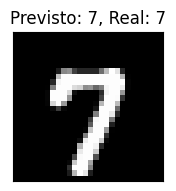

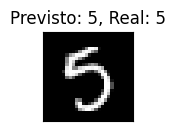

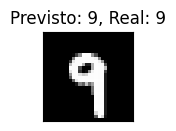

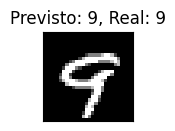

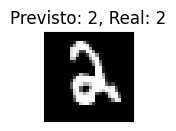

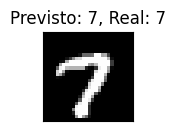

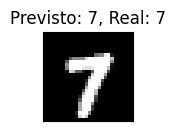

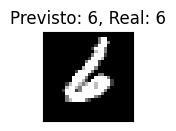

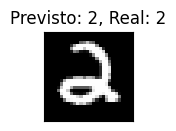

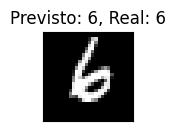

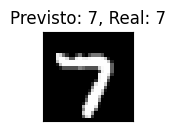

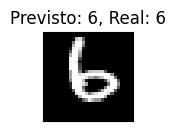

In [12]:
import matplotlib.pyplot as plt
modelo.eval()  # Coloca o modelo em modo de avaliaçãowith torch.no_grad():     
exemplos = next(iter(test_loader))    
imagens, etiquetas = exemplos[0].to(device), exemplos[1].to(device)              
saidas = modelo(imagens)   
_, predicoes = torch.max(saidas, 1)    
fig = plt.figure(figsize=(10, 4))     
for i in range(12): 
    plt.subplot(2, 6, i + 1)                           
    plt.imshow(imagens[i].cpu().numpy().squeeze(), cmap='gray') 
    plt.title(f'Previsto: {predicoes[i]}, Real: {etiquetas[i]}') 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.tight_layout()
    plt.show()

In [15]:
def  check_accuracy ( loader, modelo ): 
    """ 
    Verifica a precisão do modelo no carregador de conjunto de dados fornecido. 

    Parâmetros: 
        loader: DataLoader 
            O DataLoader para o conjunto de dados para verificar a precisão. 
        modelo: nn.Module 
            O modelo de rede neural. 
    """ 
    if loader.dataset.train: 
        print ( "Verificando a precisão nos dados de treinamento" ) 
    else : 
        print ( "Verificando a precisão nos dados de teste" ) 

    num_correct = 0
    num_samples = 0
    modelo. eval ()   # Define o modelo para o modo de avaliação 

    with torch.no_grad():   # Desabilita o cálculo de gradiente 
        for x, y in loader: 
            x = x.to(device) 
            y = y.to(device) 

            # Passagem para frente: calcula a saída do modelo
            scores = modelo(x) 
            _, predictions = scores. max ( 1 )   # Obtém o índice da probabilidade máxima de logaritmo
            num_correct +=(predictions == y). sum ()   # Contar previsões corretas
            num_samples += predictions.size( 0 )   # Contar amostras totais 

        # Calcular precisão
        accuracy = float (num_correct) / float (num_samples) * 100 
        print ( f"Obteve {num_correct} / {num_samples} com precisão {accuracy} %" ) 
    
    modelo.train()   # Retornar o modelo ao modo de treinamento 

# Verificação final de precisão nos conjuntos de treinamento e teste
check_accuracy(train_loader, modelo) 
check_accuracy(test_loader, modelo)

Verificando a precisão nos dados de treinamento
Obteve 59426 / 60000 com precisão 99.04333333333334 %
Verificando a precisão nos dados de teste
Obteve 9858 / 10000 com precisão 98.58 %
